# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

final_cities = list()
lat = list()
lng = list()
temp_max = list()
humidity = list()
cloudiness = list()
wind_speed = list()
country = list()
date = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:     
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        final_cities.append(city)
        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {city}")
            
        if counter == 50:
            set_counter = set_counter+1
            counter = 0
        
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | san fernando
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | atar
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ambikapur
Processing Record 7 of Set 1 | methoni
Processing Record 8 of Set 1 | puerto escondido
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | makakilo city
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | khatanga
City not found. Skipping...
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | telciu
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | san patricio
City not found. Skipping...
Processing Re

Processing Record 38 of Set 4 | awbari
Processing Record 39 of Set 4 | vestmanna
Processing Record 40 of Set 4 | ha giang
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | manzhouli
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | dvinskoy
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | waw
Processing Record 1 of Set 5 | vila
City not found. Skipping...
Processing Record 2 of Set 5 | canmore
Processing Record 3 of Set 5 | danesti
Processing Record 4 of Set 5 | sikasso
Processing Record 5 of Set 5 | esmeraldas
Processing Record 6 of Set 5 | chulman
Processing Record 7 of Set 5 | pocone
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | listvyanskiy
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | coos ba

Processing Record 32 of Set 8 | north myrtle beach
Processing Record 33 of Set 8 | tiksi
Processing Record 34 of Set 8 | tornio
Processing Record 35 of Set 8 | oktyabrskiy
Processing Record 36 of Set 8 | bangassou
Processing Record 37 of Set 8 | mezen
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | bonavista
Processing Record 40 of Set 8 | belaya kholunitsa
Processing Record 41 of Set 8 | zemio
Processing Record 42 of Set 8 | pedernales
Processing Record 43 of Set 8 | taman
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | fort nelson
Processing Record 47 of Set 8 | asau
Processing Record 48 of Set 8 | tual
City not found. Skipping...
Processing Record 49 of Set 8 | nicoya
Processing Record 50 of Set 8 | ciudad bolivar
Processing Record 1 of Set 9 | rawson
Processing Record 2 of Set 9 | kanniyakumari
Processing Record 3 of Set 9 | hukuntsi
Processing Record 4 of Set 9 | mandan
Processing Record 5 of Set

Processing Record 18 of Set 12 | khandbari
Processing Record 19 of Set 12 | nkowakowa
Processing Record 20 of Set 12 | el chichicaste
Processing Record 21 of Set 12 | vung tau
Processing Record 22 of Set 12 | porbandar
Processing Record 23 of Set 12 | moranbah
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | tiruchchendur
City not found. Skipping...
Processing Record 26 of Set 12 | aktau
Processing Record 27 of Set 12 | lasa
Processing Record 28 of Set 12 | shingu
Processing Record 29 of Set 12 | rundu
Processing Record 30 of Set 12 | lawrenceburg
City not found. Skipping...
Processing Record 31 of Set 12 | dapaong
Processing Record 32 of Set 12 | waipawa
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame({
    "City": final_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
})
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,37.40,93,90,11.41,US,1593572507
1,san fernando,15.03,120.69,87.80,62,75,9.17,PH,1593572508
2,butaritari,3.07,172.79,83.35,71,0,6.96,KI,1593572508
3,atar,20.52,-13.05,88.99,40,0,12.39,MR,1593572509
4,albany,42.60,-73.97,64.99,91,98,2.44,US,1593572433


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        582 non-null    object 
 1   Lat         582 non-null    float64
 2   Lng         582 non-null    float64
 3   Max Temp    582 non-null    float64
 4   Humidity    582 non-null    int64  
 5   Cloudiness  582 non-null    int64  
 6   Wind Speed  582 non-null    float64
 7   Country     582 non-null    object 
 8   Date        582 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.0+ KB


In [8]:
df.to_csv(output_data_file, index=True, index_label="City_ID")

In [17]:
df = pd.read_csv(output_data_file)
df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,barrow,71.29,-156.79,37.40,93,90,11.41,US,1593572507
1,1,san fernando,15.03,120.69,87.80,62,75,9.17,PH,1593572508
2,2,butaritari,3.07,172.79,83.35,71,0,6.96,KI,1593572508
3,3,atar,20.52,-13.05,88.99,40,0,12.39,MR,1593572509
4,4,albany,42.60,-73.97,64.99,91,98,2.44,US,1593572433


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,19.775103,13.526031,67.767595,70.702749,50.570447,8.070223,1.593573e+09
std,33.373265,89.118905,13.959014,21.238810,39.101012,5.648351,1.167084e+02
min,-54.800000,-179.170000,19.400000,1.000000,0.000000,0.560000,1.593572e+09
25%,-9.042500,-62.455000,58.330000,58.000000,5.250000,3.602500,1.593573e+09
50%,22.440000,20.160000,69.700000,76.000000,52.000000,6.930000,1.593573e+09
75%,47.032500,85.537500,78.800000,87.750000,90.000000,10.965000,1.593573e+09
max,78.220000,178.420000,99.460000,100.000000,100.000000,38.030000,1.593573e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
humid_over_100_list = newdf[newdf["Humidity"]>100].index
humid_over_100_list

Int64Index([], dtype='int64')

In [12]:
len(humid_over_100_list)

0

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,barrow,71.29,-156.79,37.40,93,90,11.41,US,1593572507
1,1,san fernando,15.03,120.69,87.80,62,75,9.17,PH,1593572508
2,2,butaritari,3.07,172.79,83.35,71,0,6.96,KI,1593572508
3,3,atar,20.52,-13.05,88.99,40,0,12.39,MR,1593572509
4,4,albany,42.60,-73.97,64.99,91,98,2.44,US,1593572433


In [170]:
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y], facecolors="dodgerblue", edgecolors="black", alpha=0.3)
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.title(f"City Latitude vs {y} (02/07/20)")
    plt.grid()
    plt.savefig(f"output_data/{x}vs{y}.png")
    plt.show()

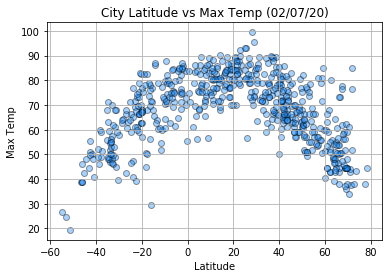

In [175]:
scatter_plot(df, "Lat", "Max Temp")

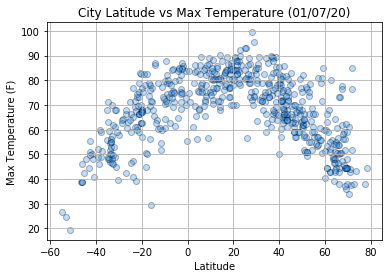

In [176]:
plt.scatter(df["Lat"], df["Max Temp"], facecolors="dodgerblue", edgecolors="black", alpha=0.3)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (01/07/20)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

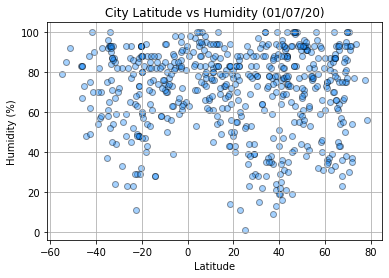

In [151]:
plt.scatter(df["Lat"], df["Humidity"], facecolors="dodgerblue", edgecolors="black", alpha=0.4)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (01/07/20)")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

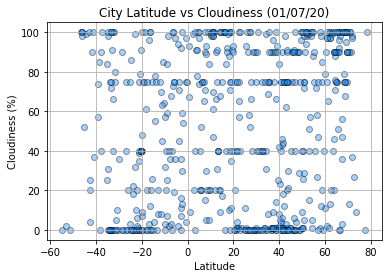

In [150]:
plt.scatter(df["Lat"], df["Cloudiness"], facecolors="dodgerblue", edgecolors="black", alpha=0.4)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (01/07/20)")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

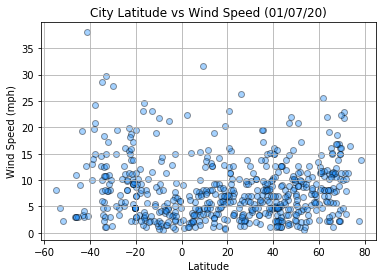

In [149]:
plt.scatter(df["Lat"], df["Wind Speed"], facecolors="dodgerblue", edgecolors="black", alpha=0.4)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (01/07/20)")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [174]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(df_name, df, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = slope * df[x] + intercept

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    
    plt.scatter(df[x], df[y], facecolors="grey", alpha=0.5)
    plt.plot(df[x], regress_values, "b--", linewidth=1)   
    plt.annotate(line_eq, (df[x].min(), df[y].quantile(0.25)), fontsize=15, color="blue")
    plt.title(f"{df_name} Hemisphere - {y} vs Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.savefig(f"output_data/Fig{df_name}_{x}vs{y}.png")
    plt.show()

In [167]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat']>=0]
southern_df = df[df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.7005430017221098
The r-squared is: 0.49076049726182397


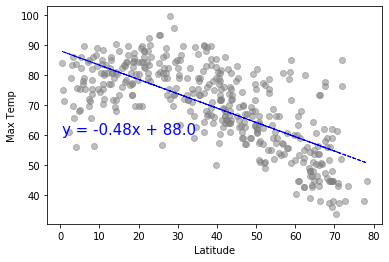

In [168]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.7352011687150878
The r-squared is: 0.540520758480031


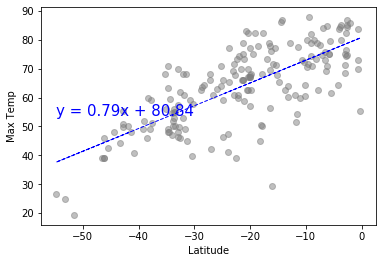

In [139]:
linear_regression_plot(southern_df, x="Lat", y="Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.06741235356397579
The r-squared is: 0.004544425413034479


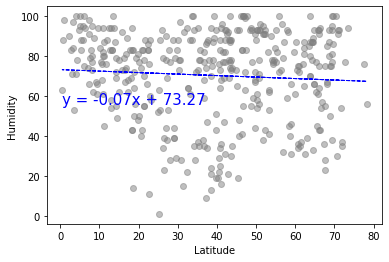

In [140]:
linear_regression_plot(northern_df, x="Lat", y="Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.03310596199117146
The r-squared is: 0.0010960047193608895


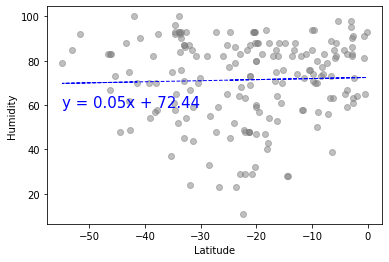

In [141]:
linear_regression_plot(southern_df, x="Lat", y="Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.09041213980217483
The r-squared is: 0.008174355023608006


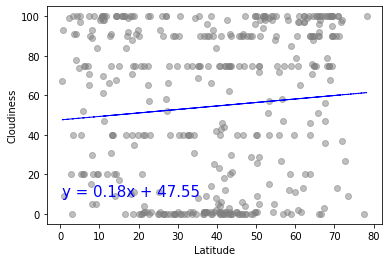

In [142]:
linear_regression_plot(northern_df, x="Lat", y="Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.017621316945615455
The r-squared is: 0.0003105108108978344


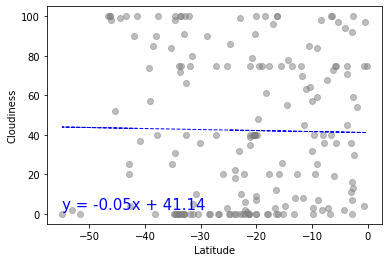

In [143]:
linear_regression_plot(southern_df, x="Lat", y="Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.19344576118529125
The r-squared is: 0.03742126252055673


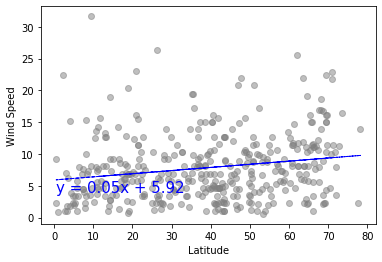

In [144]:
linear_regression_plot(northern_df, x="Lat", y="Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.23823553023342364
The r-squared is: 0.05675616786560051


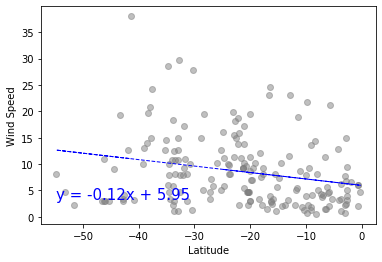

In [145]:
linear_regression_plot(southern_df, x="Lat", y="Wind Speed")